In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
np.random.seed(127)
from collections import Counter
import os

In [2]:
out_dir = os.environ.get('NOTEBOOKS', '')

# Approach 1

In this approach, I generate some columns of normally distirbuted data. I do this over and over again until by chance, the thresholded similarity matrix results in a network with a nice-looking (exponetial) degree distribution.

In [3]:
n = 200

def do(seed, start=3, step=0.5, ret=False):
    np.random.seed(seed)    
    

    c1 = np.random.normal(size=n)
    c2 = np.random.normal(size=n)
    c3 = np.random.normal(size=n)
    c4 = np.random.normal(size=n)
    c5 = np.random.normal(size=n)


    df = pd.DataFrame(dict(c1=c1, c2=c2, c3=c3, c4=c4, c5=c5))
    
    if ret:
        return df
    
    sq = squareform(pdist(df))


    fig, axes = plt.subplots(1, 6, figsize=(10.5, 3))
    fig.suptitle("seed: {}".format(seed))
    
    threshold = 3

    def threshold_func(i):
        return start + i * step 

    for i, ax in enumerate(axes.ravel()):
        threshold = threshold_func(i)
        g = nx.from_numpy_matrix(sq > threshold)

        #x_y = [(degree, np.log(count)) for degree, count in Counter(g.degree().values()).items()]
        #x, y = zip(*x_y)
        #slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        #t = np.linspace(min(x), max(x), 1000)
        #ax.set_title("T={}: S={:.2f}".format(threshold, slope))
        ax.set_title("T={}".format(threshold))
        degree_sequence=sorted(nx.degree(g).values(),reverse=True) # degree sequence
        dmax=max(degree_sequence)
        ax.loglog(degree_sequence,'b-',marker='o')


    plt.tight_layout()
    plt.show()
    

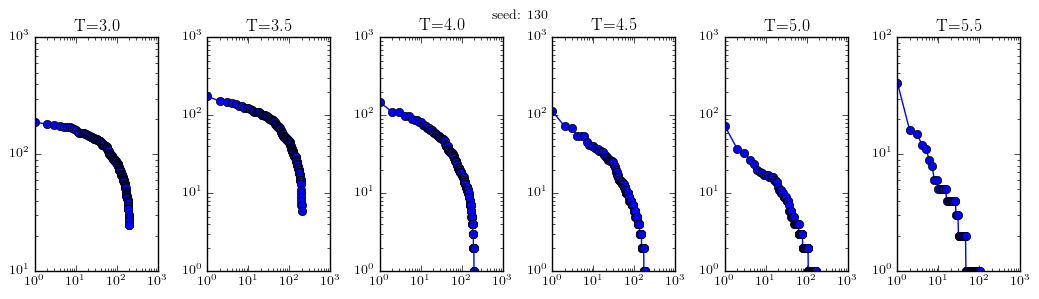

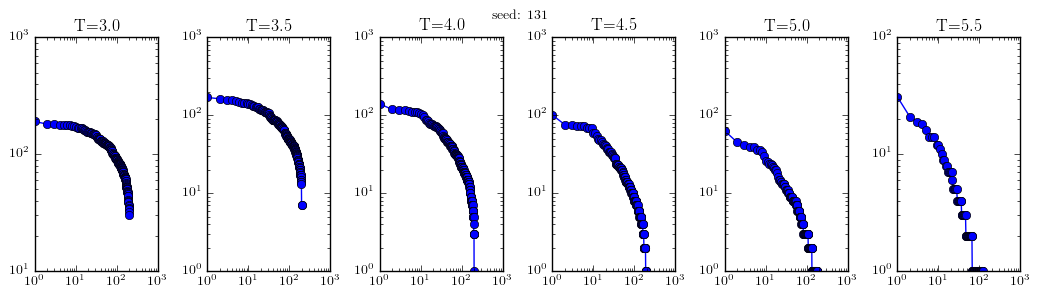

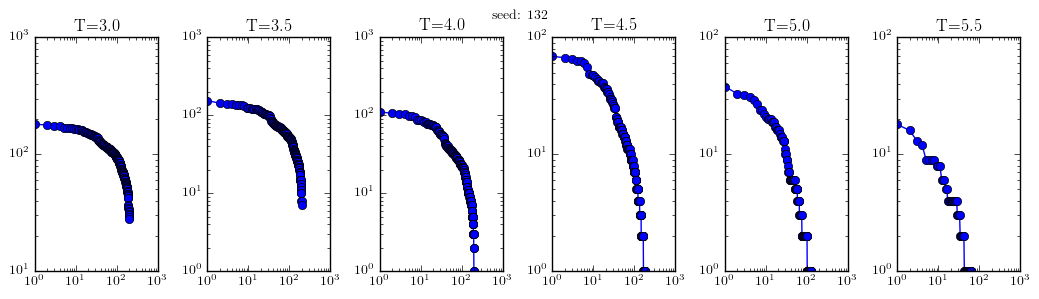

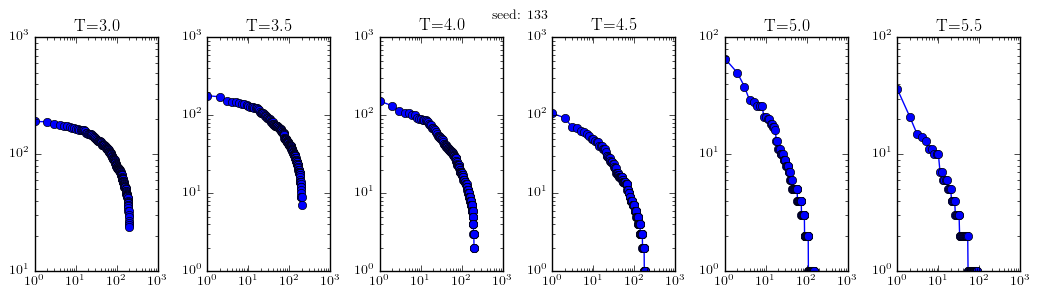

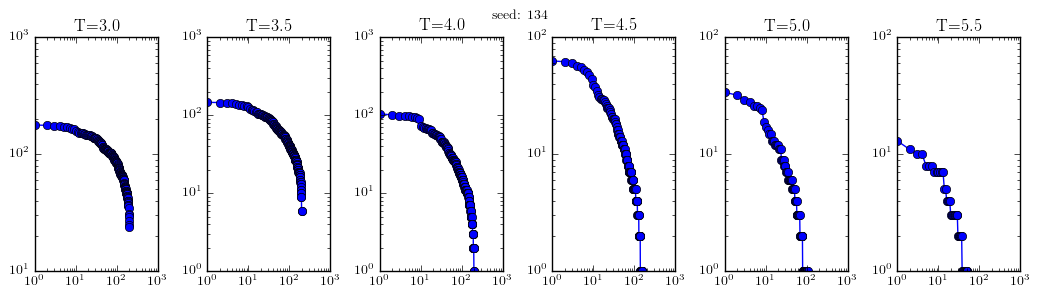

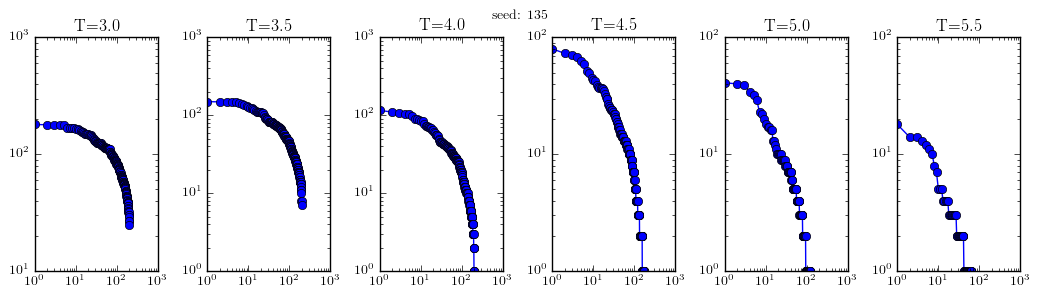

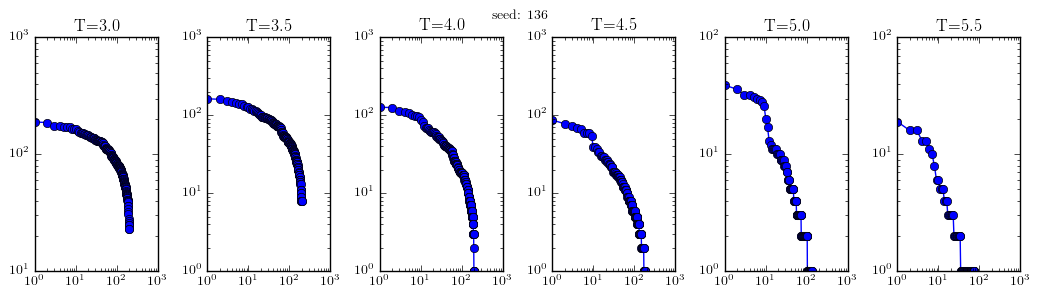

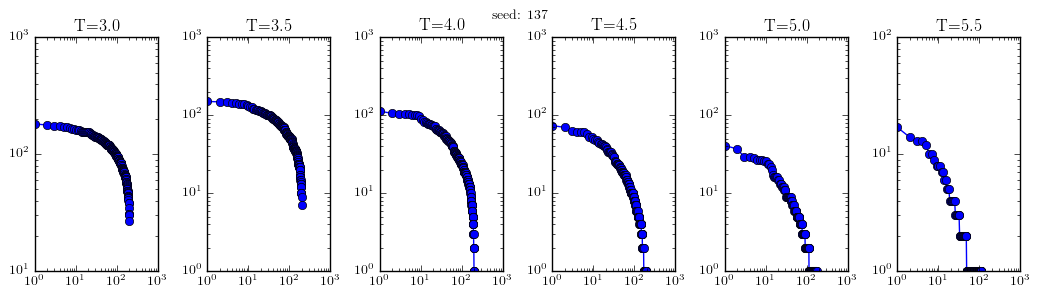

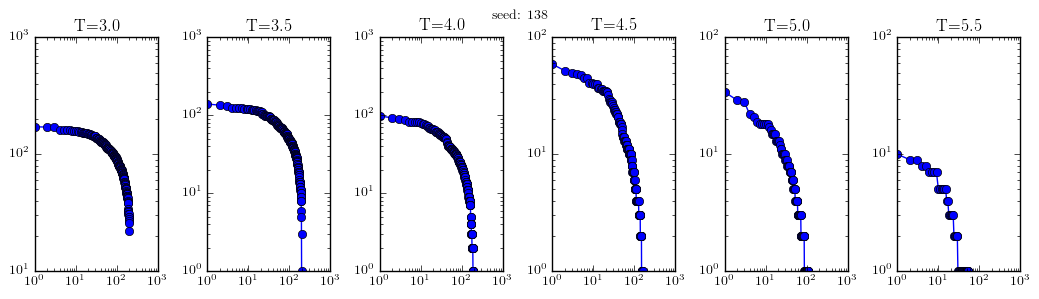

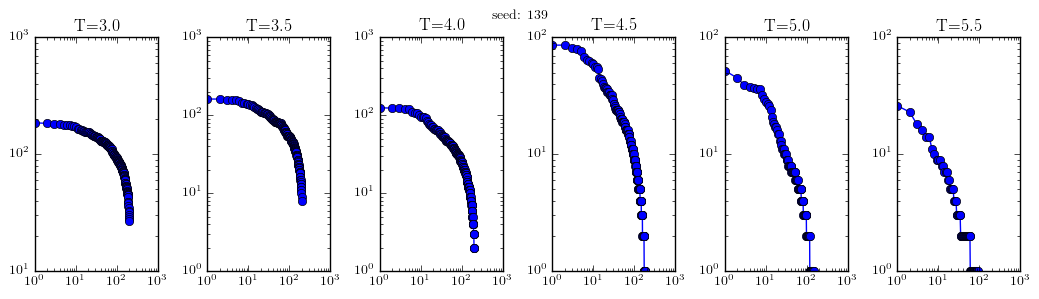

In [4]:
for i in range(130, 140):
    do(i)

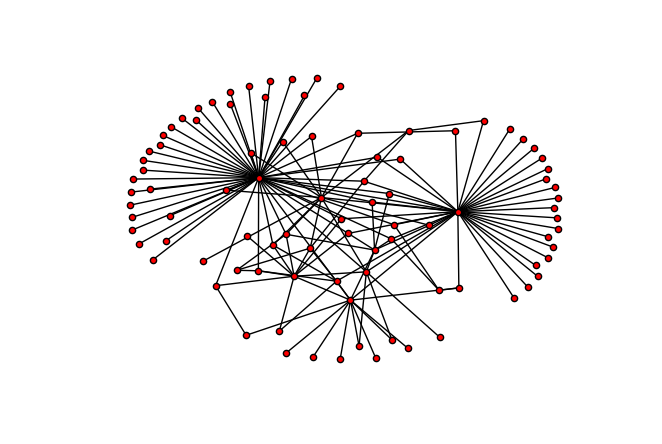

In [5]:
df = do(130, ret=True)
df.index = ['Node{:03d}'.format(i) for i in range(n)]

sq = squareform(pdist(df))
g = nx.from_numpy_matrix(sq > 5.6)
gcc = max(nx.connected_component_subgraphs(g), key=len)
nx.draw_spring(gcc, node_size=20)

In [6]:
for i, col in enumerate(df.columns):
    df[col].to_csv(os.path.join(out_dir, 'output/response{:02d}.csv'.format(i)), header=['Response'])

# Approach 2

Start with the distance matrix I want, and work backwards to get a distribution of node features.

In [7]:
n = 100
m = 1
g = nx.barabasi_albert_graph(n,m)

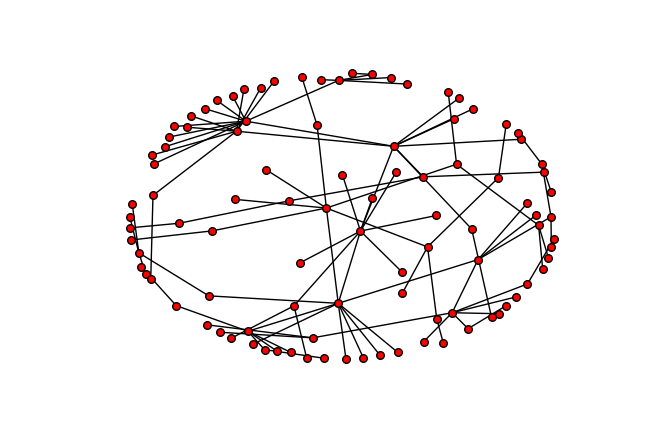

In [8]:
nx.draw_spring(g, node_size=30)
plt.show()

Try perterbing network

In [9]:
adj = nx.to_numpy_matrix(g)

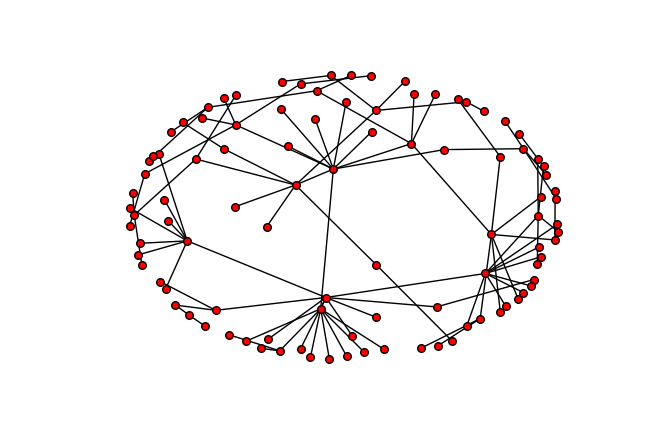

In [10]:
noise = np.random.normal(scale=0.15, size=adj.shape)

adjn = (adj + noise) > 0.7
gn = nx.from_numpy_matrix(adjn)

nx.draw_spring(gn, node_size=30)
plt.show()

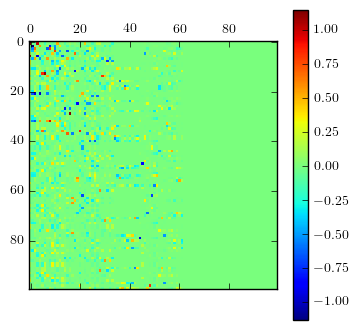

In [11]:
u, s, v = np.linalg.svd(adj)

x = (u * np.sqrt(np.diag(s)))

plt.matshow(x)
plt.colorbar()
plt.show()